## Plotting model $R^2$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
scores = {
    'NDM':pd.read_excel('../data/model_comparison.xlsx', sheet_name='NDM').set_index('cohort'),
    'linear':pd.read_excel('../data/model_comparison.xlsx', sheet_name='Linear').set_index('cohort'),
    'constant':pd.read_excel('../data/model_comparison.xlsx', sheet_name='Constant').set_index('cohort')
}

In [25]:
scores['NDM']

,cortical-r2,cortical-std,braak5-r2,braak5-std,ndm-1-8-r2,ndm-1-8-std,ndm-1-4-r2,ndm-1-4-std,ndm-4-8-r2,ndm-4-8-std
cohort,,,,,,,,,,
both_both_m1,0.44,0.11,0.48,0.10,0.50,0.11,0.36,0.10,0.50,0.12
both_both_m2,0.47,0.08,0.48,0.08,0.48,0.08,0.39,0.10,0.45,0.07
both_both_m3,0.53,0.09,0.55,0.09,0.56,0.09,0.43,0.10,0.57,0.10
both_both_m4,0.55,0.09,0.57,0.08,0.58,0.09,0.44,0.11,0.59,0.09
AD_both_m1,0.46,0.13,0.50,0.11,0.53,0.12,0.55,0.13,0.44,0.14
AD_both_m2,0.52,0.11,0.53,0.10,0.55,0.10,0.63,0.11,0.41,0.10
AD_both_m3,0.58,0.11,0.60,0.10,0.62,0.10,0.67,0.10,0.51,0.12
AD_both_m4,0.59,0.12,0.61,0.10,0.64,0.11,0.71,0.11,0.53,0.12
MCI_both_m1,0.38,0.20,0.40,0.21,0.41,0.21,0.21,0.12,0.47,0.24


In [26]:
r2_cols = [col for col in scores['NDM'].columns if 'r2' in col]
std_cols = [col for col in scores['NDM'].columns if 'std' in col]

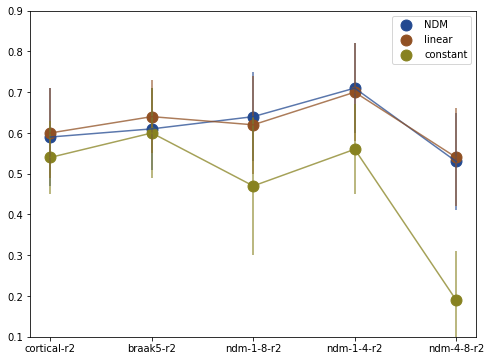

In [80]:
colors = ['#234990','#905023','#878220','#7e2390']
m=0

r2_cols = ['cortical-r2', 'braak5-r2', 'ndm-1-8-r2', 'ndm-1-4-r2', 'ndm-4-8-r2']
std_cols = ['cortical-std', 'braak5-std', 'ndm-1-8-std', 'ndm-1-4-std', 'ndm-4-8-std']

plt.figure(figsize=(8,6))
for model in scores.keys():
    plt.ylim([0.1,0.9])
    ad_r2 = scores[model][r2_cols].loc['AD_both_m4']
    ad_std = scores[model][std_cols].loc['AD_both_m4']
    plt.scatter(r2_cols, ad_r2, c=colors[m], s=120)
    plt.errorbar(r2_cols, ad_r2, ad_std, fmt=colors[m], mec=colors[m], ecolor=colors[m], ms=14, alpha=0.75)
    m += 1
plt.legend(scores.keys())
plt.show()

In [2]:
from cortography.utils import atlas_utils

# Load utility dataframe for DK regions
DK = atlas_utils.load_atlas('DK')

In [4]:
braak_5_regions = DK[ (DK['Braak stage']==5.0) & (DK['Cortex']=='cortical')]['Other Name']

In [7]:
braak_5_regions

Name
ctx-lh-bankssts                            lh_bankssts
ctx-lh-caudalmiddlefrontal      lh_caudalmiddlefrontal
ctx-lh-inferiorparietal            lh_inferiorparietal
ctx-lh-lateraloccipital            lh_lateraloccipital
ctx-lh-lateralorbitofrontal    lh_lateralorbitofrontal
ctx-lh-medialorbitofrontal      lh_medialorbitofrontal
ctx-lh-parsopercularis              lh_parsopercularis
ctx-lh-parsorbitalis                  lh_parsorbitalis
ctx-lh-parstriangularis            lh_parstriangularis
ctx-lh-precuneus                          lh_precuneus
ctx-lh-rostralmiddlefrontal    lh_rostralmiddlefrontal
ctx-lh-superiorfrontal              lh_superiorfrontal
ctx-lh-superiorparietal            lh_superiorparietal
ctx-lh-superiortemporal            lh_superiortemporal
ctx-lh-supramarginal                  lh_supramarginal
ctx-lh-frontalpole                      lh_frontalpole
ctx-lh-transversetemporal        lh_transversetemporal
ctx-rh-bankssts                            rh_bankssts
ctx-r

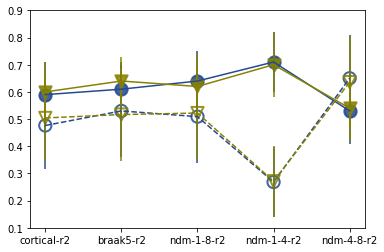

In [194]:
colors = ['#234990','#878200','#7e2390']
m=0

r2_cols = ['cortical-r2', 'braak5-r2', 'ndm-1-8-r2', 'ndm-1-4-r2', 'ndm-4-8-r2']
std_cols = ['cortical-std', 'braak5-std', 'ndm-1-8-std', 'ndm-1-4-std', 'ndm-4-8-std']

plt.figure(figsize=(6,4))
markers=['o','v']
for model in ['NDM', 'linear']:
    plt.ylim([0.1,0.9])

    ad_r2 = scores[model][r2_cols].loc['AD_both_m4']
    ad_std = scores[model][std_cols].loc['AD_both_m4']
    plt.scatter(r2_cols, ad_r2, s=150, marker=markers[m], facecolors=colors[m], edgecolors=colors[m], linewidths=2, alpha=0.85)
    plt.errorbar(r2_cols, ad_r2, ad_std, fmt=colors[m])
    
    mci_r2 = scores[model][r2_cols].loc['MCI_both_m4'] + np.random.normal(0,0.01,5)
    mci_std = scores[model][std_cols].loc['MCI_both_m4']
    plt.scatter(r2_cols, mci_r2, s=150, marker=markers[m], facecolors='none', edgecolors=colors[m], linewidths=2, alpha=0.85)
    plt.errorbar(r2_cols, mci_r2, mci_std, linestyle = '--', fmt=colors[m])
    m += 1
plt.savefig('../results/notebook_figs/SI_r2.png', dpi=150, transparent=True, bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

# Plotting $\Delta$$\tau$
This notebook plots the equation for $\Delta$$\tau$ as predicted by previous notebooks.

In [27]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

### Plotting covariates

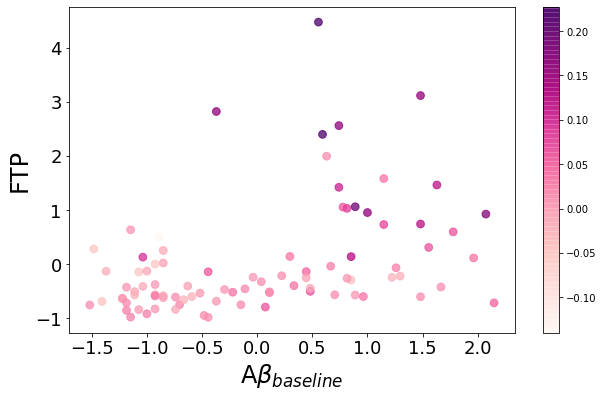

In [262]:
color_list = (AD_MCI_tau_v3 - AD_MCI_tau_v1)[NDM_predicted_regions].mean(axis=1).values

plt.figure(figsize=(10,6))
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
plt.xlabel(r'A$\beta_{baseline}$', fontsize=24)
plt.ylabel('FTP', fontsize=24)
# plt.xticks([])
# plt.yticks([])
plt.scatter(fbp.values, total_bl_tau.values, 
            c=color_list, 
            cmap = 'RdPu', 
            s=60, 
            alpha=0.75)
plt.colorbar()
plt.savefig('../results/figs/manuscript_figures/SI/ftp_vs_fbp.png', transparent=True, dpi=150)
plt.show()

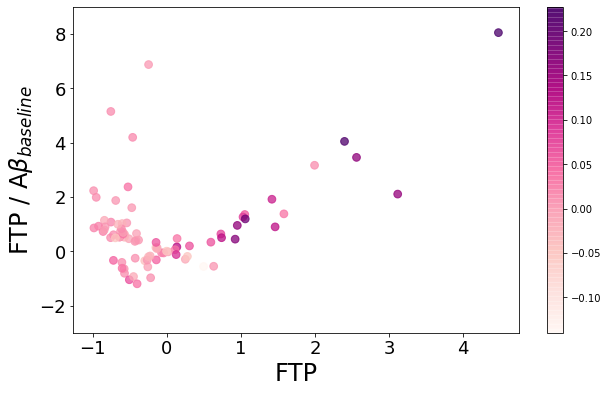

In [272]:
color_list = (AD_MCI_tau_v3 - AD_MCI_tau_v1)[NDM_predicted_regions].mean(axis=1).values

plt.figure(figsize=(10,6))
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
plt.xlabel('FTP', fontsize=24)
plt.ylabel(r'FTP / A$\beta_{baseline}$', fontsize=24)
plt.ylim([-3,9])
# plt.yticks([])
plt.scatter(total_bl_tau.values, total_bl_tau.values/fbp.values, 
            c=color_list, 
            cmap = 'RdPu', 
            s=60, 
            alpha=0.75)
plt.colorbar()
plt.savefig('../results/figs/manuscript_figures/SI/ftp_vs_ratio.png', transparent=True, dpi=150)
plt.show()

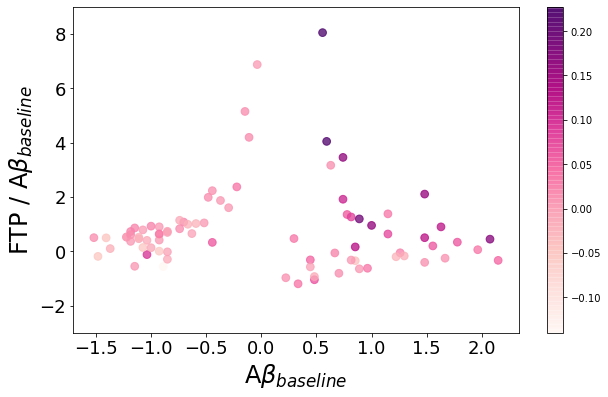

In [273]:
color_list = (AD_MCI_tau_v3 - AD_MCI_tau_v1)[NDM_predicted_regions].mean(axis=1).values

plt.figure(figsize=(10,6))
plt.xticks( fontsize=18)
plt.yticks( fontsize=18)
plt.xlabel(r'A$\beta_{baseline}$', fontsize=24)
plt.ylabel(r'FTP / A$\beta_{baseline}$', fontsize=24)
plt.ylim([-3,9])
# plt.yticks([])
plt.scatter(fbp.values, total_bl_tau.values/fbp.values, 
            c=color_list, 
            cmap = 'RdPu', 
            s=60, 
            alpha=0.75)
plt.colorbar()
plt.savefig('../results/figs/manuscript_figures/SI/fbp_vs_ratio.png', transparent=True, dpi=150)
plt.show()

In [28]:
xy_dict = make_regression_variables(subjects='AD', model=2, regions_to_average=list(cortical_regions))
X,Y = xy_dict['X'], xy_dict['Y']

model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
model.coef_.ravel()

array([-6.35736788e-05, -7.92176599e-03])

In [30]:
model.intercept_[0]

-0.12393744304569362

In [32]:
fbp

Randomized ID
457551    0.79
340386    1.43
147691    1.10
482082    0.92
407884    1.06
          ... 
415597    1.08
302547    1.65
125928    1.14
869853    0.88
599264    0.95
Name: Florbetapir SUVr, Length: 88, dtype: float64

In [17]:
a,b = list(model.coef_.ravel())
c = model.intercept_[0]

In [18]:
model.coef_.ravel()

array([ 0.00095534, -0.00027261,  0.00018059])

In [ ]:
amyloid = np.linspace(0.8,2,100)
tau = np.linspace(50,100,100)

In [3]:
X = np.array([[A for i in range(len(tau))] for A in amyloid])
Y = np.array([[t for t in tau] for A in amyloid])
Z = np.array([[-100*(a*t + b*A + c*(t/A)) + d for t in tau] for A in amyloid])

NameError: name 'np' is not defined

In [ ]:
%matplotlib inline

In [ ]:
# xx = fbp
# yy = total_bl_tau
# zz = [-100*(a*yy[i] + *yy[i] + c*(yy[i]/xx[i])) + d for i in range(len(fbp))]

In [ ]:
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 2])
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
# scat = ax.scatter(xx,yy,zz, s=400)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm_r,
                       linewidth=0, antialiased=False,alpha=0.2)

In [ ]:
AD_MCI_v1_df

## Plotting coefficients

In [181]:
model_test = make_regression_variables(subjects='AD', model=2, regions_to_average=list(cortical_regions))
X, Y = model_test['X'], model_test['Y']
bootstrapped_data = calculate_bootstrap_samples(X=X, Y=Y)

In [182]:
par0 = [bootstrapped_data['models'][i].coef_[0][0] for i in range(5000)]
par1 = [bootstrapped_data['models'][i].coef_[0][1] for i in range(5000)]
intercept = [bootstrapped_data['models'][i].intercept_[0] for i in range(5000)]


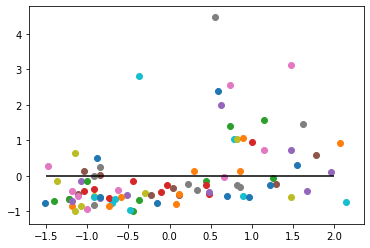

In [210]:
for i in range(len(fbp)):
    plt.scatter(fbp.values[i], total_bl_tau.values[i])
plt.hlines(y=0, xmin=-1.5, xmax=2.0)

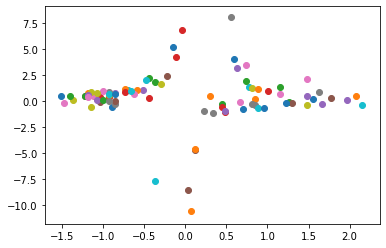

In [204]:
for i in range(len(fbp)):
    plt.scatter(fbp.values[i], total_bl_tau.values[i]/fbp.values[i])

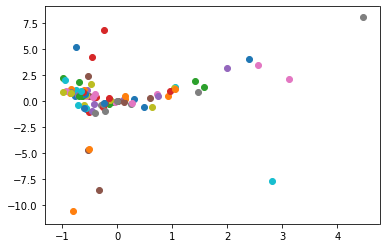

In [205]:
for i in range(len(fbp)):
    plt.scatter(total_bl_tau.values[i], total_bl_tau.values[i]/fbp.values[i])

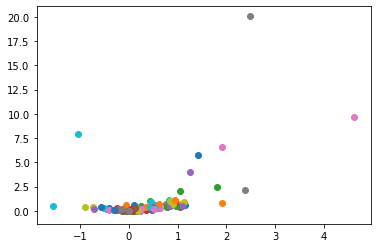

In [217]:
for i in range(len(fbp)):
    plt.scatter(fbp.values[i]*total_bl_tau.values[i], total_bl_tau.values[i]*total_bl_tau.values[i])

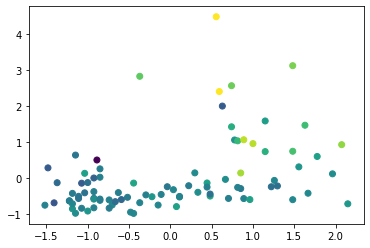

In [222]:
color_list = (AD_MCI_tau_v3 - AD_MCI_tau_v1)[cortical_regions].sum(axis=1).values

plt.scatter(fbp.values, total_bl_tau.values, c=color_list, cmap = 'viridis')


-0.002050495030861213

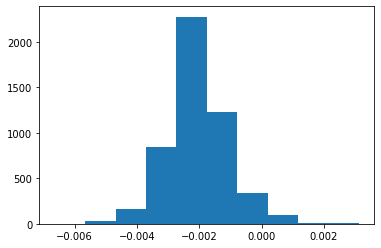

In [190]:
_ = plt.hist(par0)
np.array(par0).mean()

-0.0022743297404906764

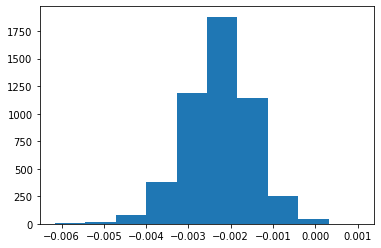

In [191]:
_ = plt.hist(par1)
np.array(par1).mean()

0.018995808459075794

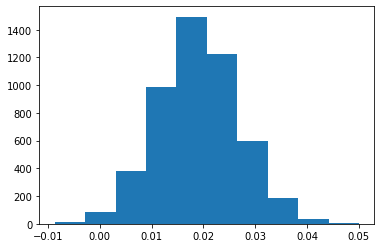

In [192]:
_ = plt.hist(intercept)
np.array(intercept).mean()

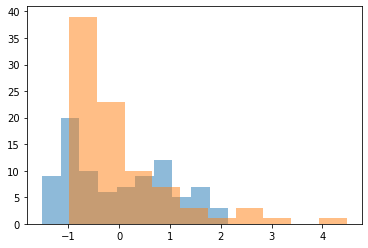

In [180]:
_ = plt.hist(fbp, alpha=0.5)
_ = plt.hist(total_bl_tau, alpha=0.5)

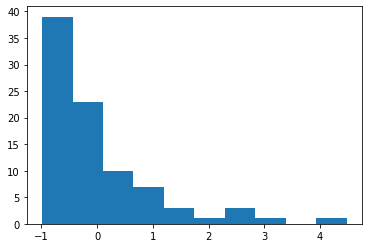

In [177]:
dd

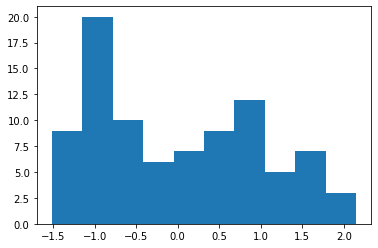

In [164]:
_ = plt.hist(fbp)